In [42]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

数据导入

In [43]:
#读取数据
import pandas as pd
data =pd.read_csv('desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df =pd.DataFrame(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
print("去重前数据大小为：{0}".format(df.shape))
df.drop_duplicates()
print("去重后数据大小为：{0}".format(df.shape))

去重前数据大小为：(7043, 21)
去重后数据大小为：(7043, 21)


In [46]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [71]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

数据可视化

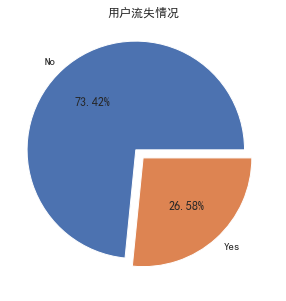

In [72]:
#用户流失情况，NO为未流失，Yes为流失
plt.rcParams['figure.figsize']=5,5
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,autopct='%.2f%%',explode=(0.1,0))
plt.title('用户流失情况')
plt.show()

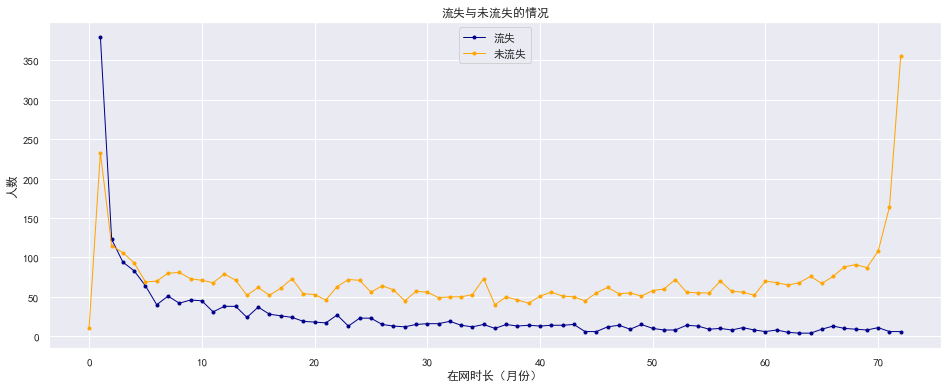

In [49]:
#用户在网时长的流失情况
x=data[data['Churn']=='Yes']
y=data[data['Churn']=='No']
tenurefig,ax1 = plt.subplots(1,1,figsize=(16,6))
x.groupby(x.tenure).size().plot(color = 'darkblue', marker = ".", linewidth = 1)
y.groupby(y.tenure).size().plot(color = 'orange', marker = ".", linewidth = 1)
ax1.legend(['流失','未流失'])
ax1.set_xlabel('在网时长（月份）')
ax1.set_ylabel('人数')
ax1.set_title('流失与未流失的情况')
plt.show()

Text(0.5, 1.0, '是否有家属用户的流失分析')

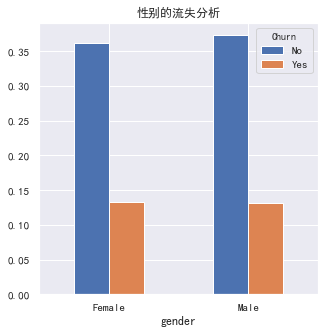

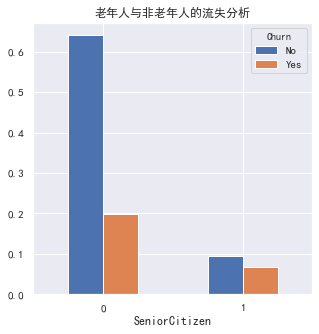

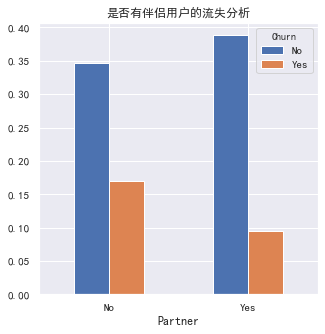

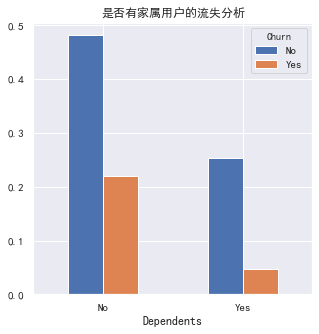

In [50]:
def plt_bar(featrue):
    df=(data.groupby(data[featrue])['Churn'].value_counts()/len(data)).unstack()
    df.plot(kind='bar')
    plt.xticks(rotation=0)

plt_bar('gender')
plt.title('性别的流失分析')
plt_bar('SeniorCitizen')
plt.title('老年人与非老年人的流失分析')
plt_bar('Partner')
plt.title('是否有伴侣用户的流失分析')
plt_bar('Dependents')
plt.title('是否有家属用户的流失分析')

In [51]:
#查看TotalCharges列中的空值数
(df['TotalCharges']==" ").sum()

11

In [52]:
#删除TotalCharges列中的空值的行
df.drop(df[df["TotalCharges"]==" "].index, axis=0, inplace=True)
df.index = range(df.shape[0])
df['TotalCharges'] = pd.to_numeric(df["TotalCharges"])

In [53]:
scaler = ["tenure", "MonthlyCharges", "TotalCharges"]
df_nor = df.copy()

In [54]:
df_nor[scaler] = df[scaler]

In [55]:
df_nor.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
# 用one_hot编码将分类变量转换为数值变量
df_oh0 = df_nor.iloc[:, 1:]
print("one_hot编码前特征数量：{0}".format(df_oh0.shape))
df_oh1 = pd.get_dummies(df_oh0)
print("one_hot编码后特征数量：{0}".format(df_oh1.shape))

one_hot编码前特征数量：(7032, 20)
one_hot编码后特征数量：(7032, 47)


In [57]:
range_ = df_oh1.columns.tolist()
range_.remove("Churn_No")
df_oh = df_oh1.loc[:, range_]
df_oh.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1


In [58]:
#删除customerID列
customerID=df['customerID']
df.drop(['customerID'],axis=1, inplace=True)

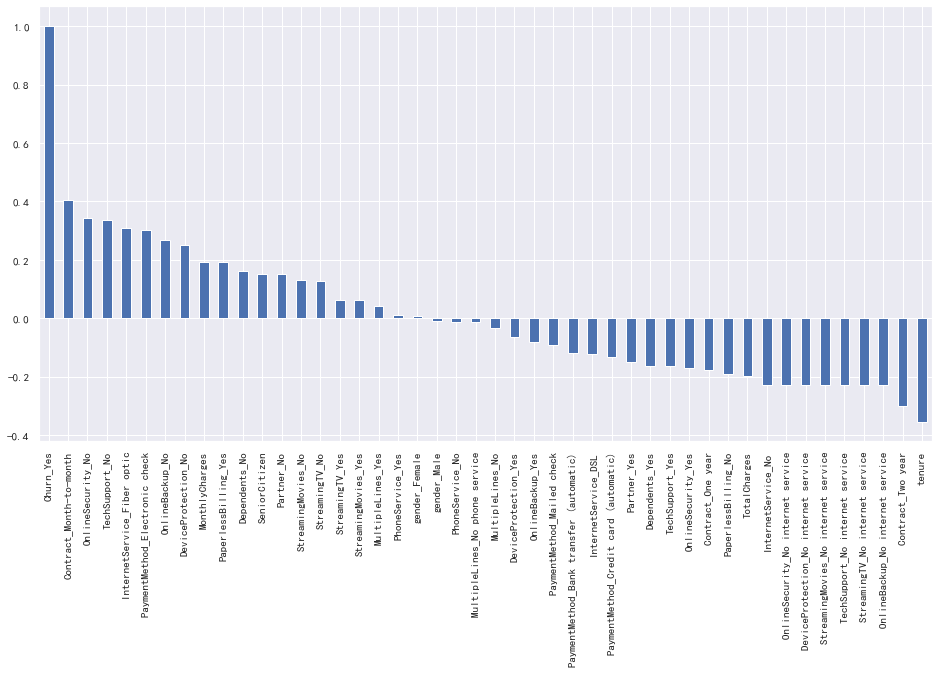

In [59]:
#查看数据之间的关联
plt.figure(figsize=(16,8))
df_oh.corr()['Churn_Yes'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [60]:
# 删除无用特征
df.drop = ['gender_Female','gender_Male','PhoneService_Yes','PhoneService_No','OnlineSecurity_No internet service', 'OnlineBackup_No internet service','DeviceProtection_No internet service', 'TechSupport_No internet service','StreamingTV_No internet service', 'StreamingMovies_No internet service','OnlineSecurity_No', 'OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No', 'StreamingMovies_No']
df_oh.drop(df.drop, inplace=True, axis =1) 
target = df_oh['Churn_Yes'].values
columns = df_oh.columns.tolist()

In [61]:
# 训练集和测试集分类
columns.remove('Churn_Yes')
features = df_oh[columns].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)

In [62]:
#树模型的训练集和测试集的score
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6,random_state=0)
tree.fit(x_train,y_train)
print("test set score:{:.2f}".format(tree.score(x_test, y_test)))
print("training set score:{:.2f}".format(tree.score(x_train, y_train)))

test set score:0.78
training set score:0.81


In [63]:
#knn训练集和测试集的score
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train, y_train)
print("Test score: {:.2f}".format(clf.score(x_test, y_test)))
print("Train score: {:.2f}".format(clf.score(x_train, y_train)))

Test score: 0.78
Train score: 0.81


In [64]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=11000).fit(x_train, y_train)

E:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [65]:
#linearSVC训练集和测试集的score
print("Training set score: {:.2f}".format(linear_svm.score(x_train, y_train)))
print("Test set score: {:.2f}".format(linear_svm.score(x_test, y_test)))

Training set score: 0.77
Test set score: 0.77


k: 10 score: 0.781042654028436


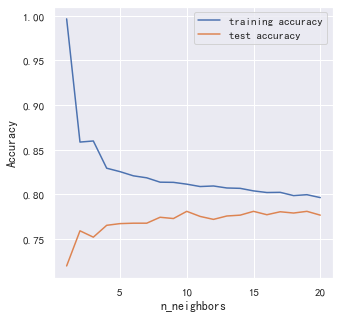

In [66]:
#knn模型
training_accuracy=[]
test_accuracy=[]
#n的范围是1-20
neighbors_settings=range(1,21)
for n_neighbors in neighbors_settings:
    #建立模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train,y_train)
    #预测
    training_accuracy.append(clf.score(x_train,y_train))
    test_accuracy.append(clf.score(x_test,y_test))
#画图
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
optimal_k=test_accuracy.index(max(test_accuracy))+1
print("k:",optimal_k,"score:",max(test_accuracy))

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]
             , 'max_iter': [500, 1000, 2000, 3000]}
clf0 = LogisticRegression()
grid_search = GridSearchCV(clf0, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("测试集上的最好分数：{:.3f}".format(grid_search.score(x_test, y_test)))


测试集上的最好分数：0.809


In [68]:
print("最好的参数：{0}".format(grid_search.best_params_))
print("交叉验证的得分：{:.3f}".format(grid_search.best_score_))

最好的参数：{'C': 0.1, 'max_iter': 500}
交叉验证的得分：0.803


In [69]:
print("模型参数：{0}".format(grid_search.best_estimator_))

模型参数：LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


混淆矩阵：
[[1452   97]
 [ 374  187]]

分类报告：
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1549
           1       0.66      0.33      0.44       561

    accuracy                           0.78      2110
   macro avg       0.73      0.64      0.65      2110
weighted avg       0.76      0.78      0.75      2110



Text(21.5, 0.5, 'true label')

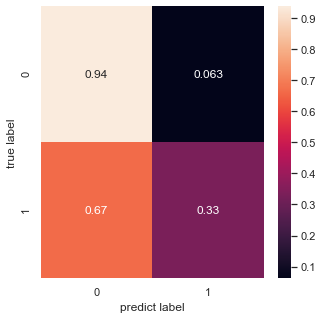

In [70]:
# 混淆矩阵
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Ypredict = clf.predict(x_test)

labels = [0, 1]
sns.set()
cm = confusion_matrix(y_test,Ypredict, labels=labels)

print("混淆矩阵：\n{0}".format(cm))
print("\n分类报告：\n{0}".format(classification_report(y_test, Ypredict, target_names=["0", "1"])))

cm_normalized = cm/cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized,annot=True)
plt.xlabel('predict label')
plt.ylabel('true label')
